In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# above .data file is comma delimited
file_data = pd.read_csv(file_path, delimiter=",", header=None)
# columns are created for the header
file_data.columns = ['id number', 
                    'Clump Thickness', 
                    'Uniformity of Cell Size', 
                    'Uniformity of Cell shape', 
                    'Marginal Adhesion', 
                    'Single Epithelial Cell Size',
                    'Bare Nuclei',
                    'Bland Chromatin',
                    'Normal Nucleoli',
                    'Mitoses',
                    'Class']
print(file_data)

     id number  Clump Thickness  Uniformity of Cell Size  \
0      1000025                5                        1   
1      1002945                5                        4   
2      1015425                3                        1   
3      1016277                6                        8   
4      1017023                4                        1   
..         ...              ...                      ...   
694     776715                3                        1   
695     841769                2                        1   
696     888820                5                       10   
697     897471                4                        8   
698     897471                4                        8   

     Uniformity of Cell shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1       

In [2]:
# the shape of the dataset
file_data.shape

(699, 11)

In [3]:
# the data type of the columns
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
# the Bare Nuclei attribute returned object as its data type as it was realised that the column contain regular expressions.
# the regular expression was replaced with NaN 
file_data['Bare Nuclei'].replace(regex=True,inplace=True,to_replace=r'\D',value=np.nan)


In [5]:
# the sum of NaN values of the Bare Nuclie column was displayed
file_data['Bare Nuclei'].isnull().sum()

16

In [6]:
# the null values were dropped and the new shape was displayed
data = file_data.dropna()
data.shape

(683, 11)

In [7]:
# check for missing values
data.isnull().sum()

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
# the Bare Nuclei column was changed from object type to int64 
data['Bare Nuclei'] = np.asarray(data['Bare Nuclei'].astype(np.int64))

<ipython-input-8-df652702ad53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bare Nuclei'] = np.asarray(data['Bare Nuclei'].astype(np.int64))


In [9]:
# statistical analysis were conducted for the new obtained data
data.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
# the value 2 signify benign and 4 signify malignant
data.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [11]:
# since we are dealing with binary class labels, the benign and malignant labels were replaced with 1 and 0 respectively
data['Class'] = data['Class'].replace([2,4],[1,0])
data['Class']

<ipython-input-11-2aa88c45e86f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class'] = data['Class'].replace([2,4],[1,0])


0      1
1      1
2      1
3      1
4      1
      ..
694    1
695    1
696    0
697    0
698    0
Name: Class, Length: 683, dtype: int64

In [12]:
# the data was grouped by the class label and the mean of the labels in respect to the attributes were determined
data.groupby('Class').mean()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,,
0,1.005121e+06,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510
1,1.115261e+06,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315


In [13]:
# Here we separate the features from the targets
X_data = data.drop(columns=['id number', 'Class'])
Y_data = data['Class']

In [14]:
# split the dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=2)


In [15]:
print(X_data.shape, X_train.shape, X_test.shape)

(683, 9) (546, 9) (137, 9)


Build the neural network

In [16]:
""" The neural network was built using tensor flow library"""
# import the necessary neural network libraries
import tensorflow as tf
tf.random.set_seed(3) # this is used to produce same accuracy score each time the program is ran


In [17]:
# building the layers
hidden_layer_size = 5
output_size = 2
model = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(9,)),
                              tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                              tf.keras.layers.Dense(output_size, activation='sigmoid')
])


In [18]:
# pick the optimizer and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the model
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)


Epoch 1/10
16/16 [==============================] - 1s 16ms/step - loss: 1.0037 - accuracy: 0.6640 - val_loss: 0.9904 - val_accuracy: 0.6182
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.6660 - val_loss: 0.8713 - val_accuracy: 0.6182
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.8019 - accuracy: 0.6660 - val_loss: 0.7915 - val_accuracy: 0.6182
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.7468 - accuracy: 0.6701 - val_loss: 0.7400 - val_accuracy: 0.6182
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.7095 - accuracy: 0.6864 - val_loss: 0.7019 - val_accuracy: 0.6909
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.8024 - val_loss: 0.6709 - val_accuracy: 0.8545
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.8595 - val_loss: 0.6406 - val_accuracy: 0.8727
Epoch 8/10
16/16 [=

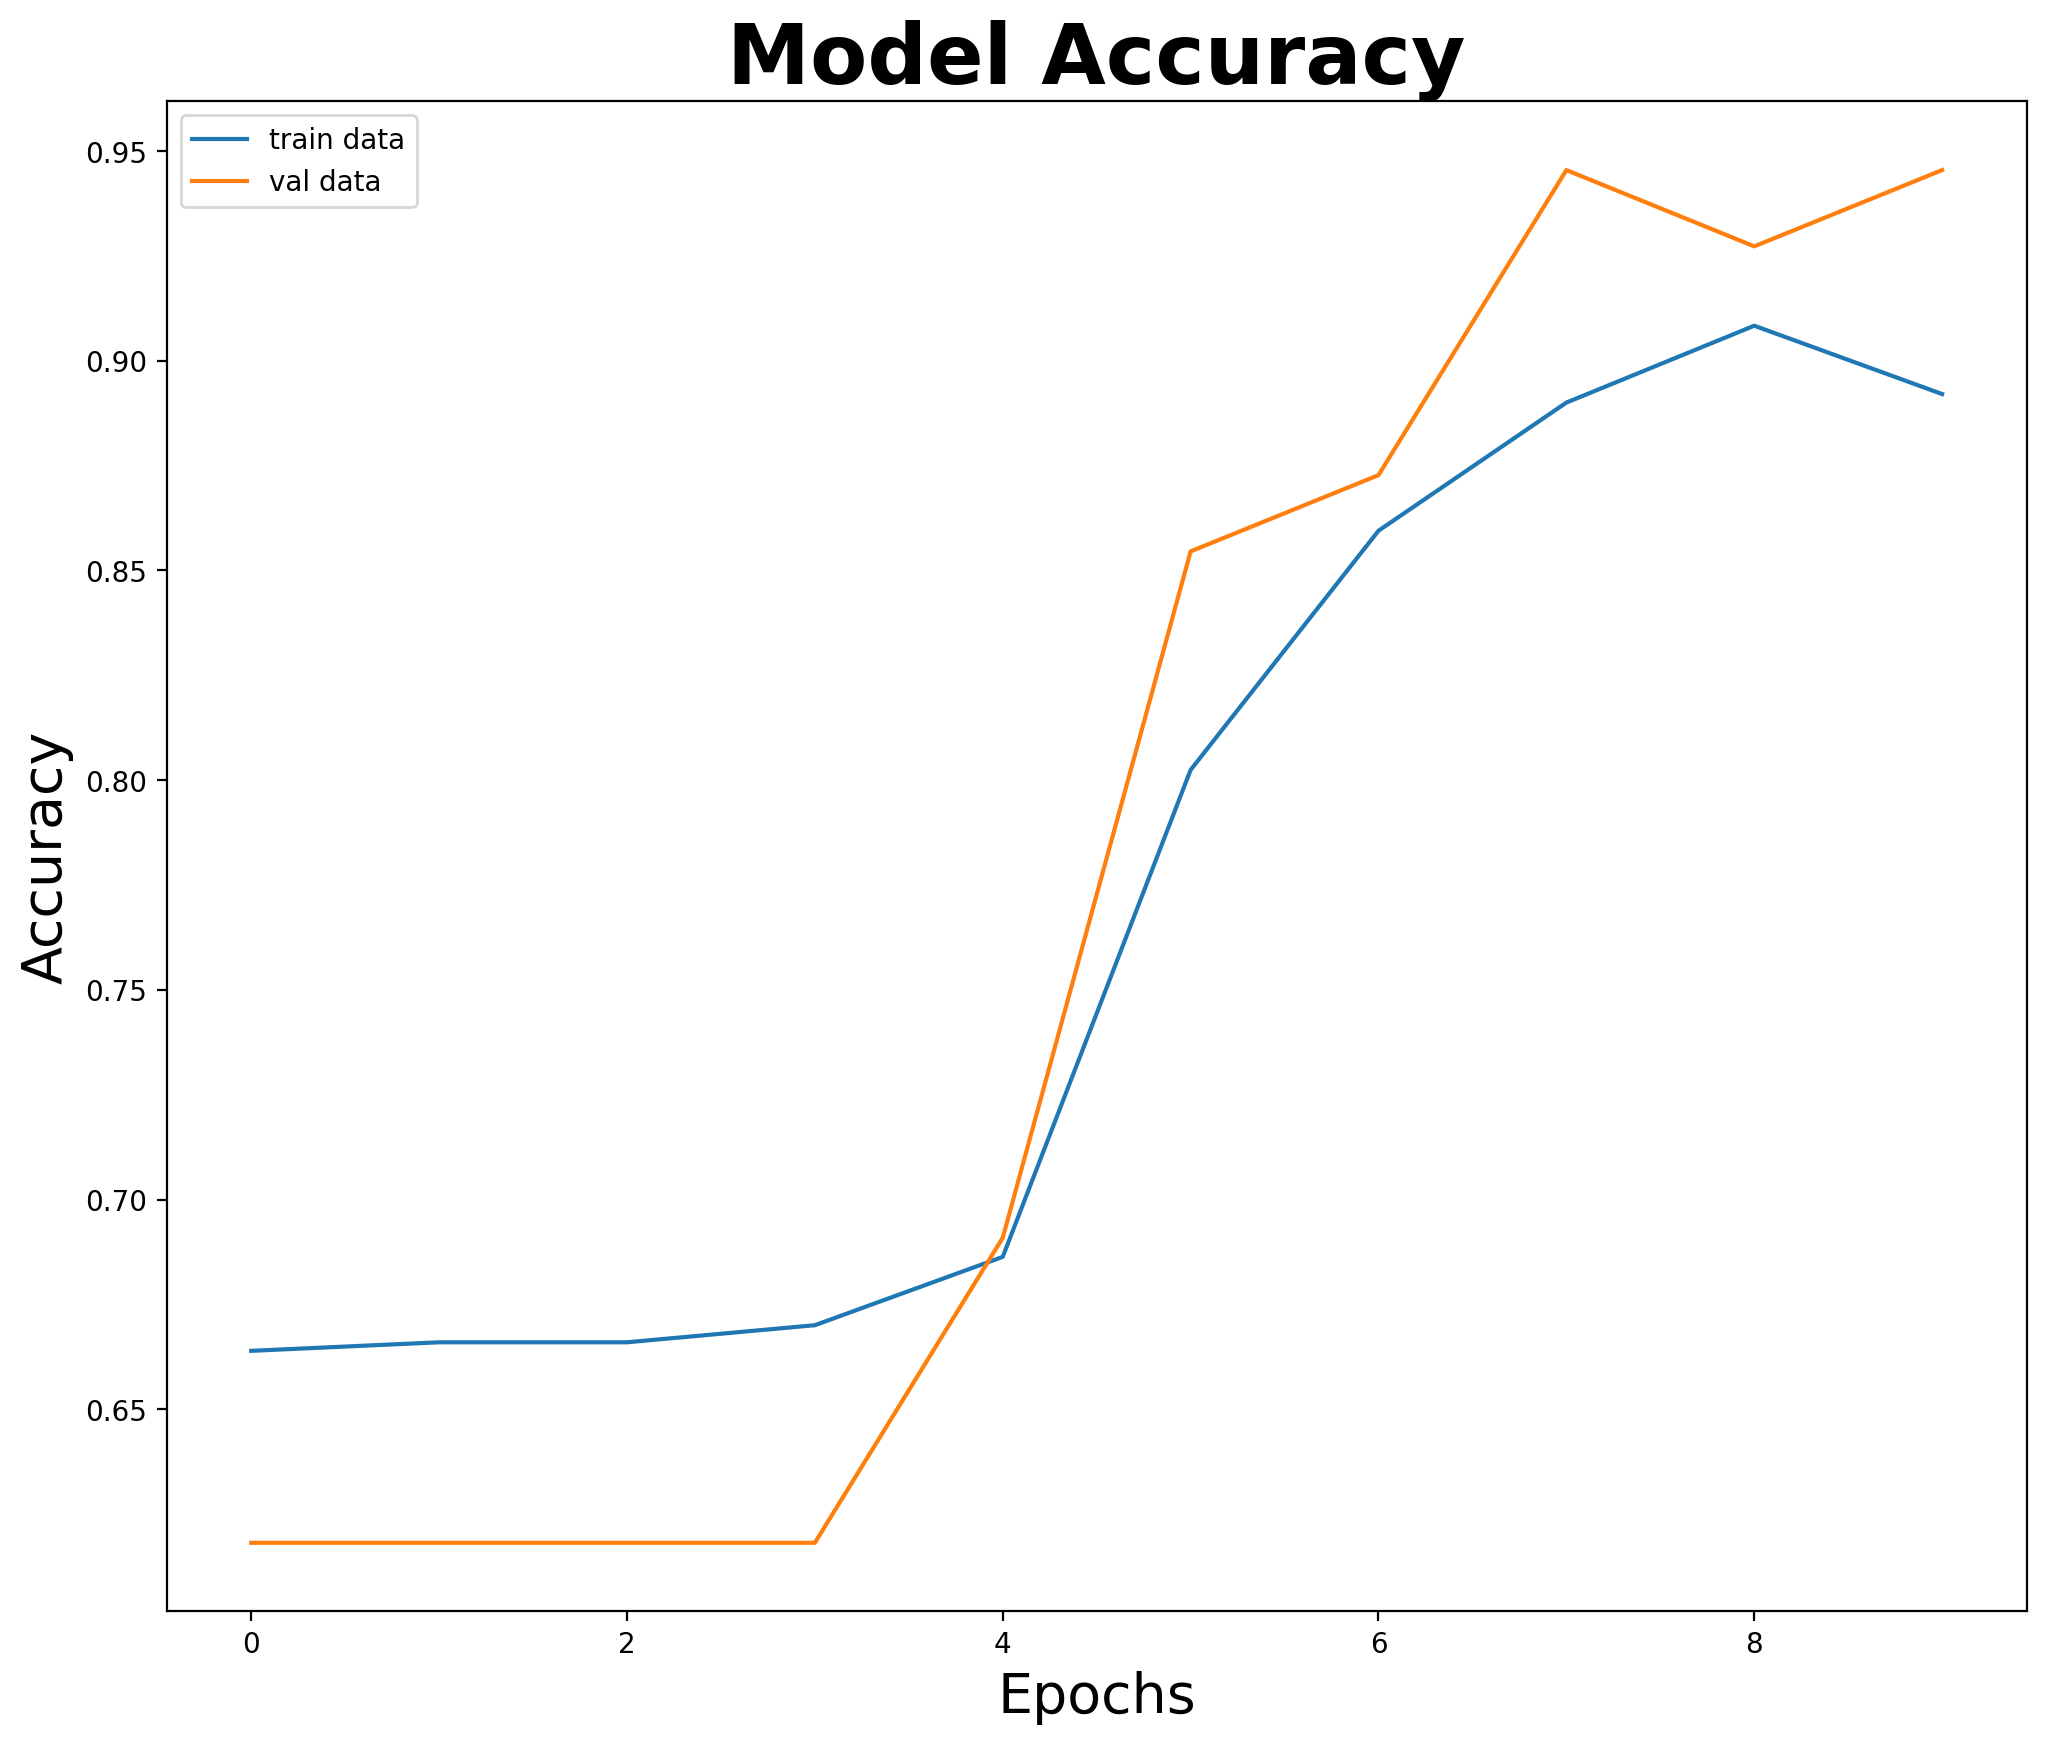

In [20]:
# this is model accuracy plot
plt.figure(figsize=(12,10), dpi=200)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy', fontsize=30, fontweight='bold')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(['train data', 'val data'])
plt.show()

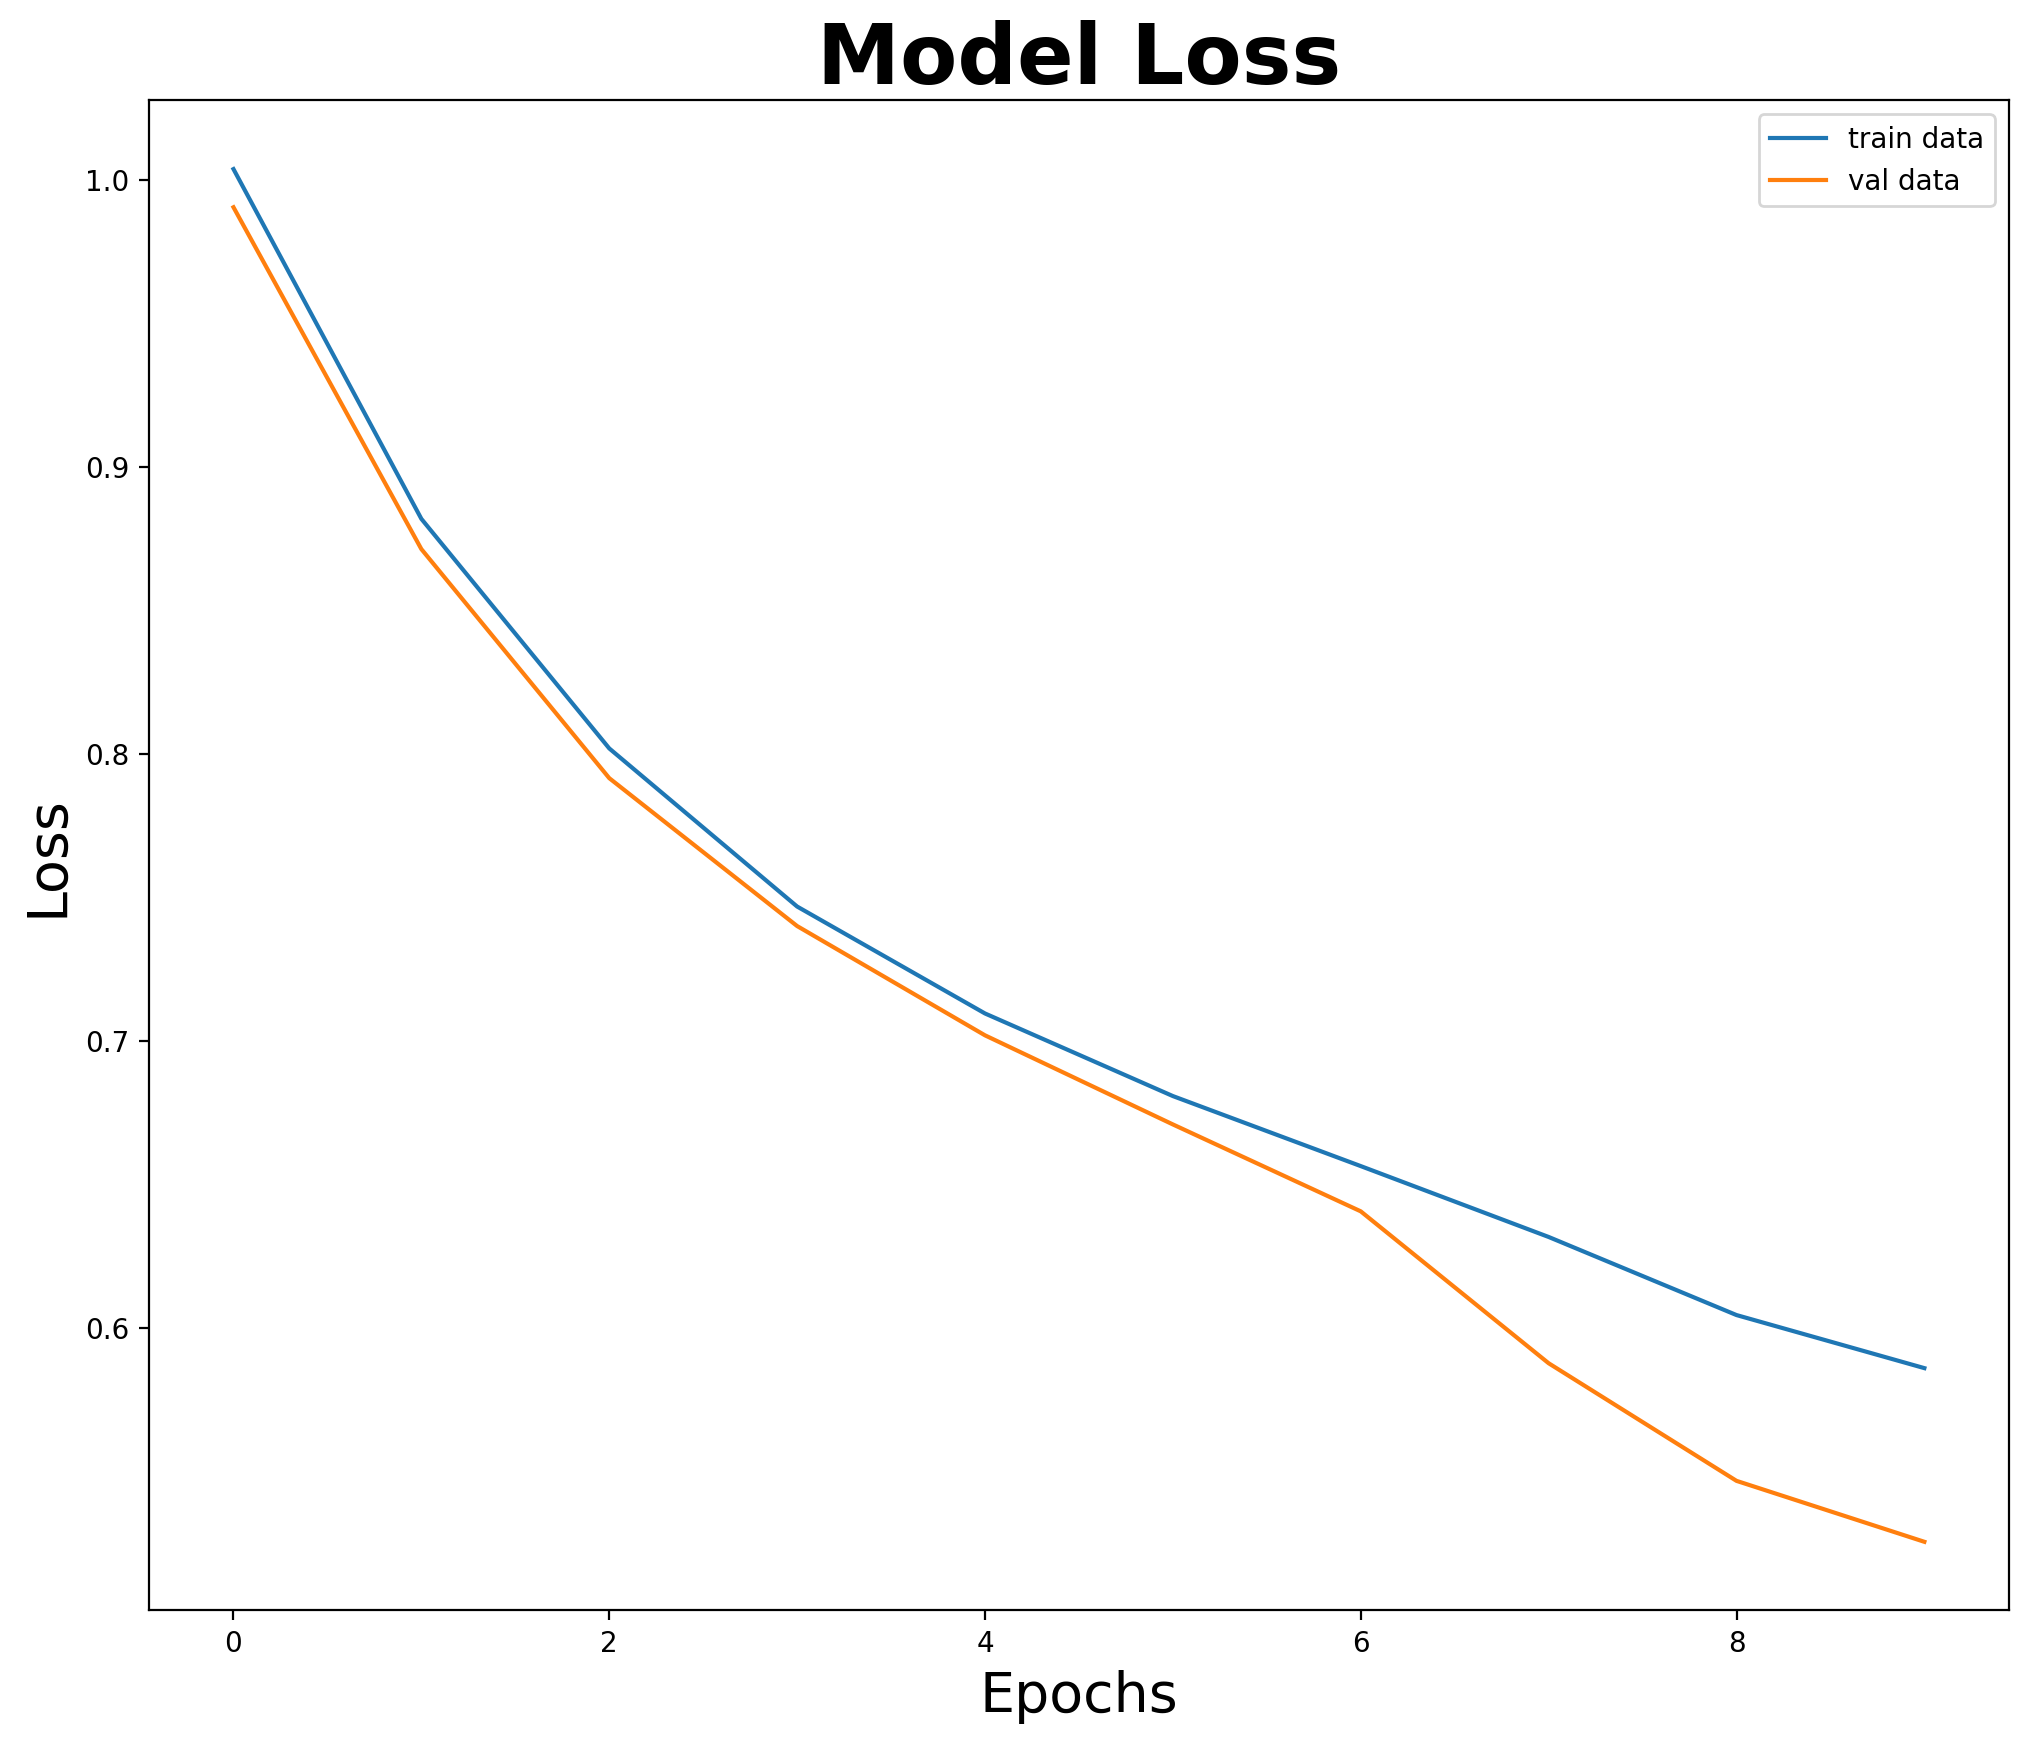

In [26]:
# this is the model loss
plt.figure(figsize=(12,10), dpi=200)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss', fontsize=30, fontweight='bold')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(['train data', 'val data'])
plt.show()

In [22]:
# accuracy of the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test loss: {0:.2f}, Test Accuracy: {1:.2f}%'.format(loss, accuracy*100))

5/5 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.8394
Test loss: 0.59, Test Accuracy: 83.94%


In [23]:
# model.predict() calculates the probability of each class for a particular dataset
y_pred = model.predict(X_test)
print(y_pred)

5/5 [==============================] - 0s 4ms/step
[[5.6566861e-03 1.5456054e-03]
 [3.3839021e-03 2.3590096e-03]
 [4.5486990e-01 5.2554470e-01]
 [1.5572056e-01 1.7022417e-01]
 [1.2504442e-01 6.1852932e-02]
 [1.4897005e-01 1.6213220e-01]
 [2.5203562e-01 2.8684106e-01]
 [2.1824621e-01 2.4583405e-01]
 [2.5189605e-01 2.8667185e-01]
 [1.8558539e-03 8.7491685e-04]
 [2.5805217e-01 2.9413253e-01]
 [3.4757486e-01 4.0154719e-01]
 [4.1146841e-02 1.2533472e-02]
 [2.5564015e-01 4.2618375e-02]
 [6.4304627e-02 6.3746035e-02]
 [2.5495496e-01 2.9037967e-01]
 [7.9353591e-03 6.1212378e-03]
 [1.0237362e-01 1.0706462e-01]
 [2.2883804e-01 2.5869343e-01]
 [2.5059387e-01 1.3527359e-01]
 [4.3031368e-01 4.9776036e-01]
 [2.2883804e-01 2.5869343e-01]
 [3.5830901e-03 4.8106772e-04]
 [8.6170668e-03 1.0179617e-03]
 [6.4092726e-02 1.0146568e-02]
 [3.6461574e-01 4.2165554e-01]
 [2.2304088e-01 2.5165510e-01]
 [2.7433041e-02 1.9043693e-03]
 [2.6430559e-01 3.0170527e-01]
 [2.8856246e-02 2.5989259e-02]
 [9.4713017e-02 9.8

In [24]:
# convert the predicted probability into class labels

y_predict_labels = [np.argmax(i) for i in y_pred]
print(y_predict_labels)

[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]


In [25]:
# Here we have to build a predictive system 
input_data = (5,1,1,1,2,1,3,1,1)
# convert the input_data to numpy array
input_numpy = np.asarray(input_data)
# reshape the array as one data point is being predicted
input_reshaped = input_numpy.reshape(1,-1)

prediction = model.predict(input_reshaped)
print(prediction)
# the argmax numpy function returns the max index 0f the label
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 4):
  print('The tumor is malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 113ms/step
[[0.21213423 0.23841485]]
[1]
The tumor is Benign
